In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('final_cleaned_data.csv')
df.head()

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,Salary Estimate,Sector,Size,Type of ownership,avg_salary,company_age,job_title_simplified,avg_revenue
0,Buckman,-1,1945.0,"Memphis, TN",Chemical Manufacturing,Job Description – Data Scientist Location: Ch...,Data Scientist,Chennai,3.5,₹50 to ₹100 billion (INR),27000 - 29000,Manufacturing,1001 to 5000 employees,Company - Private,28000.0,75.0,data scientist,75.0
1,Blue Yonder,"SAP, Oracle, Manhattan Associates",1985.0,"Scottsdale, AZ",Enterprise Software & Network Solutions,What You Should Expect To ride the wave of AI...,Data Scientist,Bengaluru,4.3,₹100 to ₹500 billion (INR),1712000 - 1846000,Information Technology,5001 to 10000 employees,Company - Private,1779000.0,35.0,data scientist,300.0
2,PayPal,"Square, Amazon, Apple",1998.0,"San Jose, CA",Internet,Provide analytical insights into emerging prob...,Data Scientist,Bengaluru,3.6,₹500+ billion (INR),220000 - 236000,Information Technology,10000+ employees,Company - Public,228000.0,22.0,data scientist,500.0
3,Amazon,"Google, Microsoft, Walmart",1994.0,"Seattle, WA",Internet,"At Amazon, we strive to be most customer-centr...",Data Scientist,Hyderabad,4.2,₹500+ billion (INR),1549198,Information Technology,10000+ employees,Company - Public,1549198.0,26.0,data scientist,500.0
4,Accenture,"Cognizant Technology Solutions, EY, McKinsey &...",1989.0,"Dublin, Ireland",Consulting,NaN,Data Scientist,Mumbai,3.9,₹500+ billion (INR),1055493,Business Services,10000+ employees,Company - Public,1055493.0,31.0,data scientist,500.0


In [3]:
df.shape

(596, 18)

In [4]:
df.describe()

,Founded,Rating,avg_salary,company_age,avg_revenue
count,481.000000,596.000000,5.960000e+02,481.000000,596.000000
mean,1985.463617,3.829195,8.171653e+05,34.536383,279.998322
std,44.466833,0.499936,6.881223e+05,44.466833,162.136352
min,1690.000000,2.100000,5.500000e+03,1.000000,0.000000
25%,1985.000000,3.500000,3.026900e+05,9.000000,280.000000
50%,2000.000000,3.800000,7.169615e+05,20.000000,280.000000
75%,2011.000000,4.200000,1.191566e+06,35.000000,300.000000
max,2019.000000,5.000000,4.181500e+06,330.000000,500.000000


In [5]:
df.dtypes

Company Name             object
Competitors              object
Founded                 float64
Headquarters             object
Industry                 object
Job Description          object
Job Title                object
Location                 object
Rating                  float64
Revenue                  object
Salary Estimate          object
Sector                   object
Size                     object
Type of ownership        object
avg_salary              float64
company_age             float64
job_title_simplified     object
avg_revenue             float64
dtype: object

In [6]:
#number of jobs per categories
df['job_title_simplified'].value_counts()

data scientist               279
analyst                      135
data engineer                 86
other                         50
machine learning engineer     35
manager                       10
director                       1
Name: job_title_simplified, dtype: int64

In [7]:
#number of unique locations
len(df['Location'].unique())
#df['Location'].value_counts()

39

In [8]:
#number of jobs in each city
df['Location'].value_counts()[:8]

Bengaluru    259
Mumbai        65
Hyderabad     52
Pune          47
Chennai       45
Gurgaon       19
Noida         18
New Delhi     18
Name: Location, dtype: int64

In [9]:
#number of unique companies
len(df['Company Name'].unique())

427

In [10]:
df['Type of ownership'].value_counts()

Company - Private                 380
Company - Public                  191
Subsidiary or Business Segment     11
Unknown                             6
Private Practice / Firm             3
Government                          2
Other Organisation                  1
College / University                1
Non-profit Organisation             1
Name: Type of ownership, dtype: int64

#### private companies provide more no of jobs

In [11]:
df['Location'].value_counts()[:15]

Bengaluru             259
Mumbai                 65
Hyderabad              52
Pune                   47
Chennai                45
Gurgaon                19
Noida                  18
New Delhi              18
India                  17
Thiruvananthapuram      6
Maharashtra             5
Kochi                   4
Kolkata                 4
Chandigarh              3
Ahmedabad               3
Name: Location, dtype: int64

#### Bengaluru have the most jobs
#### There are 17 companies which have not provided the cites

### Visualisation

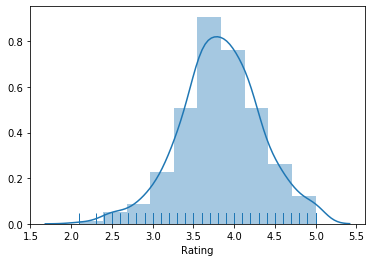

In [12]:
sns.distplot(df['Rating'],bins=10,rug=True)

#### The distribution of the company rating is normally distributed. No company seems to have a rating significantly below 2 and there are a good amount of companies having rating around 3.7.

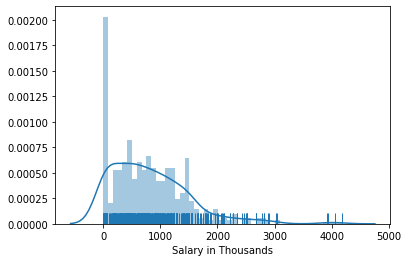

In [13]:
sns.distplot(df['avg_salary']/1000,bins=50,rug=True,axlabel='Salary in Thousands')

In [14]:
df['avg_salary'].mean()

817165.288590604

#### It looks like the salary is not normally distributed which is expected. There is a slight skew towards the high end of salary which also makes sense because there are some higher paying jobs for experienced data professionals.

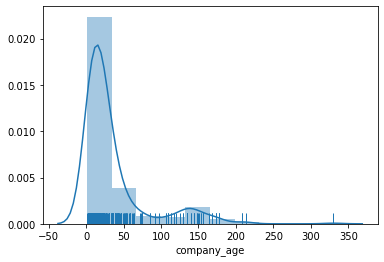

In [15]:
sns.distplot(df['company_age'],bins=10,rug=True)

#### company age in approxly normally distributed,slightly skewed to the right i.e dataset have less number of  very old companies.
#### most of the companies are 5 to 60 year old.

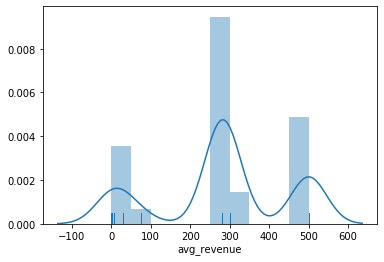

In [16]:
sns.distplot(df['avg_revenue'],bins=10,rug=True)

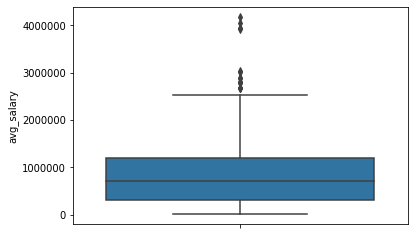

In [17]:
#plt.figure(figsize=(8,6))
#plt.yscale('log')
sns.boxplot(y='avg_salary',data=df)

#### Box plot also show the outliers in the salary as sum companies pay a very high amount of salary but the are very few.
#### 75percentile of salary is around 1000k.

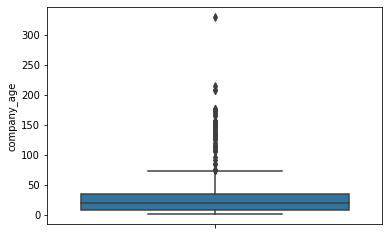

In [18]:
sns.boxplot(y='company_age',data=df)

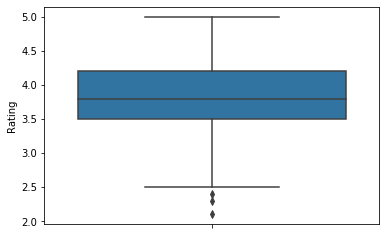

In [19]:
sns.boxplot(y='Rating',data=df)

#### Most of the companies have rating around 4.Also there are soem outlier some company also have very less ratings.

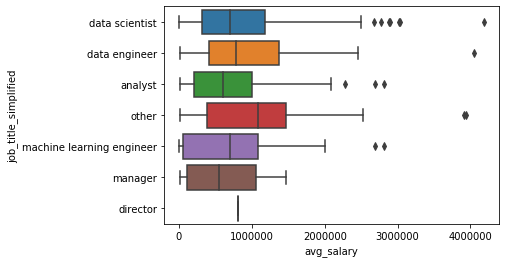

In [20]:
sns.boxplot(x = 'avg_salary', y='job_title_simplified', data = df)

#### Upper bound of data scientist is slighlt higher then the data engineers,both are paid some what similar amount of salary.The next highest paying job is machine learning engineer but the upper bound is less than the data analyst job.It is surprising that manager post is getting paid less then the data scientist and data engineers.Also in most cases data scientist and data engineers are the managers.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

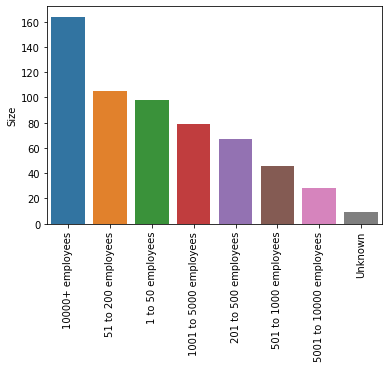

In [21]:
size=df['Size'].value_counts()
chart = sns.barplot(x=size.index, y=size)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(rotation='vertical')


#### Most of the companies are large(have 10000+ employees)

In [22]:
salary_by_role = df.groupby(['job_title_simplified'])['avg_salary'].mean().reset_index().sort_values('avg_salary', ascending = False)
salary_by_role

,job_title_simplified,avg_salary
6,other,1.060368e+06
1,data engineer,8.855891e+05
2,data scientist,8.270284e+05
3,director,8.075750e+05
4,machine learning engineer,8.044574e+05
0,analyst,6.822678e+05
5,manager,6.040790e+05


Text(0.5, 1.0, 'Salary by Role')

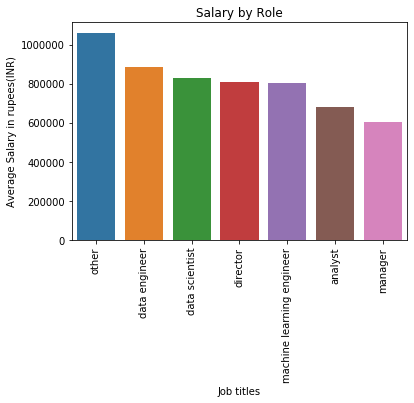

In [23]:
# create a plot that shows the salary for each role visually
ax = sns.barplot(x = 'job_title_simplified', y = 'avg_salary', data = salary_by_role)
plt.xticks(rotation='vertical')

ax.set_ylabel('Average Salary in rupees(INR)')
ax.set_xlabel('Job titles')
ax.set_title('Salary by Role')

#### Data Engineer are paid slightly high then the data scientiest and next highest paid job is machine learning engineer and then analyst.It is still surprising that managers are paid less.

In [24]:
companies_provide_max_jobs=df['Company Name'].value_counts()[:15]

Text(0.5, 1.0, 'Companies have most job posting')

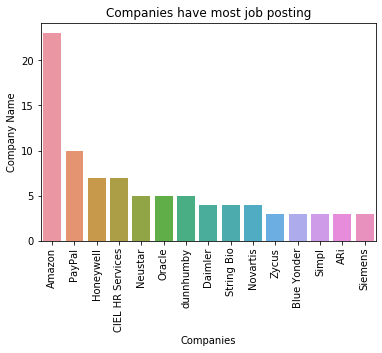

In [25]:
#top companies that provide max job posting
ax=sns.barplot(x=companies_provide_max_jobs.index,y=companies_provide_max_jobs)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
)
ax.set_xlabel('Companies')
ax.set_title('Companies have most job posting')

### Amazon,Paypal,Honeywell,CIEL HR Services ,Oracle have the most job post in this dataset.

In [26]:
df['Company Name'].value_counts()[:5]

Amazon              23
PayPal              10
Honeywell            7
CIEL HR Services     7
Neustar              5
Name: Company Name, dtype: int64

In [27]:
job_location=df['Location'].value_counts()[:8]

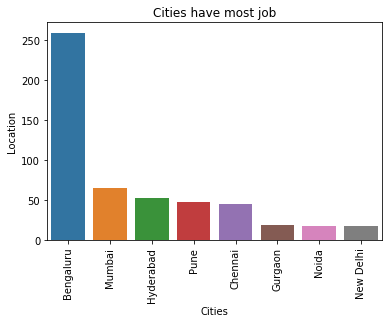

In [28]:
#top 8 locations that have max job posting
ax=sns.barplot(x=job_location.index,y=job_location)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
)
ax.set_xlabel('Cities')
ax.set_title('Cities have most job')
plt.savefig('top_cities.png',bbox_inches='tight',pad_inches=0.5)

#### Bengaluru,Mumbai,Hyderabad,Pune,Chennai,Gurgaon,New Delhi,Noida have the highest number of jobs

In [29]:
df['Location'].value_counts()[:8]

Bengaluru    259
Mumbai        65
Hyderabad     52
Pune          47
Chennai       45
Gurgaon       19
Noida         18
New Delhi     18
Name: Location, dtype: int64

### Lets find out the top 10 loactions with highest average salary.

Text(0, 0.5, 'Average Salary in rupees(INR)')

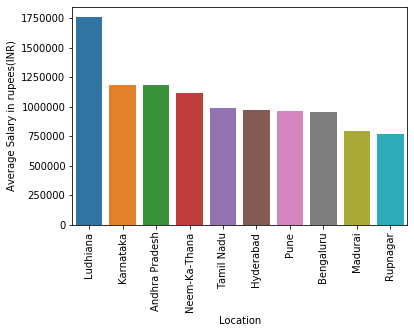

In [30]:
df2=df.groupby(['Location'])['avg_salary'].mean().reset_index().sort_values('avg_salary', ascending = False)[:10]
ax = sns.barplot(x = 'Location', y = 'avg_salary', data = df2)
plt.xticks(rotation='vertical')
ax.set_ylabel('Average Salary in rupees(INR)')

### Lets find out top 20 companies which are paying the highest salaries.

In [31]:
df2=df.groupby(['Company Name'])['avg_salary'].mean().reset_index().sort_values('avg_salary', ascending = False)[:20]


Text(0.5, 0, 'Company Names')

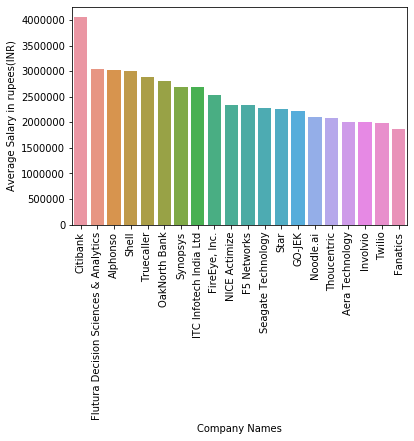

In [32]:
ax = sns.barplot(x = 'Company Name', y = 'avg_salary', data = df2)
plt.xticks(rotation='vertical')

ax.set_ylabel('Average Salary in rupees(INR)')
ax.set_xlabel('Company Names')

### Lets find the Average Salaries according to the job title in each company.

In [33]:
df3=df.groupby(by=['Company Name','job_title_simplified'])['avg_salary'].mean().reset_index().sort_values(by='avg_salary',ascending=False)[:15]
df3

,Company Name,job_title_simplified,avg_salary
368,Shell,data scientist,4181500.0
87,Citibank,data engineer,4050451.0
156,Flutura Decision Sciences & Analytics,data scientist,3037500.0
19,Alphonso,data scientist,3018970.0
441,Truecaller,data scientist,2891000.0
294,OakNorth Bank,analyst,2812813.0
295,OakNorth Bank,machine learning engineer,2812813.0
83,Cisco Systems,data scientist,2773500.0
401,Synopsys,machine learning engineer,2683599.0
400,Synopsys,analyst,2683599.0


Text(0, 0.5, 'Average Salary in rupees(INR)')

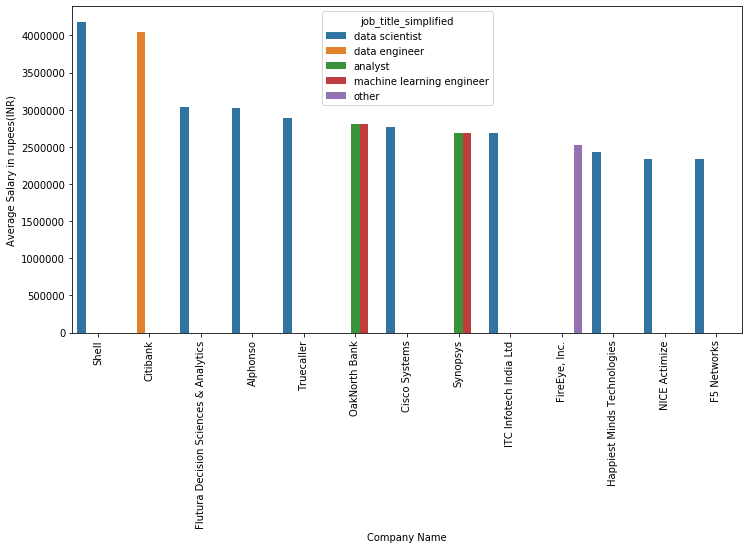

In [34]:

fig, a= plt.subplots(figsize=(12,6))

ax = sns.barplot(x = 'Company Name', y = 'avg_salary', hue='job_title_simplified',ax=a,data = df3)

#lt.figure(figsize=(15,15)) #give the size of graph

plt.xticks(rotation=90)
ax.set_ylabel('Average Salary in rupees(INR)')

In [35]:
pd.pivot_table(df, index = ['Company Name','job_title_simplified'], values = 'avg_salary').sort_values('avg_salary', ascending = False)[:10]

avg_salary
Company Name                          job_title_simplified                 
Shell                                 data scientist              4181500.0
Citibank                              data engineer               4050451.0
Flutura Decision Sciences & Analytics data scientist              3037500.0
Alphonso                              data scientist              3018970.0
Truecaller                            data scientist              2891000.0
OakNorth Bank                         analyst                     2812813.0
                                      machine learning engineer   2812813.0
Cisco Systems                         data scientist              2773500.0
Synopsys                              machine learning engineer   2683599.0
                                      analyst                     2683599.0

In [36]:
#df.groupby(by=['Company Name','job_title_simplified'])['avg_salary'].mean().sort_values(ascending=False)[:10]

### Lets check is there any relation between Revenue and Average salary

In [37]:
df4=pd.read_csv('final_cleaned_data.csv')

In [38]:
group_revenue=df4.groupby(by=['Revenue'])['avg_salary'].mean().reset_index().sort_values(by='avg_salary',ascending=False)
group_revenue

,Revenue,avg_salary
10,₹500+ billion (INR),1.164594e+06
4,₹100 to ₹500 billion (INR),1.069781e+06
7,₹50 to ₹100 billion (INR),9.307901e+05
5,₹100 to ₹500 million (INR),9.055952e+05
2,₹10 to ₹50 billion (INR),7.139005e+05
6,₹5 to ₹10 billion (INR),7.126474e+05
1,₹1 to ₹5 billion (INR),7.053508e+05
0,Unknown / Non-Applicable,6.421049e+05
9,₹500 million to ₹1 billion (INR),5.715883e+05
3,₹10 to ₹50 million (INR),9.380000e+04


Text(0, 0.5, 'Average Salary in rupees(INR)')

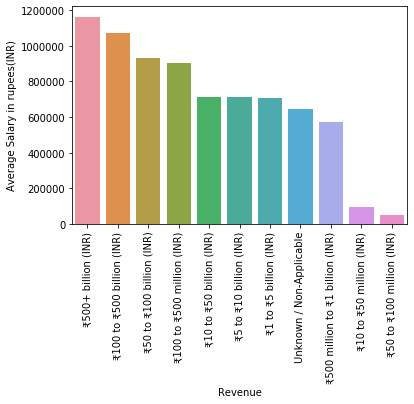

In [39]:
ax = sns.barplot(x = 'Revenue', y = 'avg_salary',data = group_revenue)
plt.xticks(rotation='vertical')
ax.set_ylabel('Average Salary in rupees(INR)')

### By the above graph we can say that higher the revenue of the company high it pay the salary.
### Also there is a outlier in the above graph i.e company that have revenue ₹100 to ₹500 million (INR) gives good amount of salary.

In [40]:
df.head()

,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,Salary Estimate,Sector,Size,Type of ownership,avg_salary,company_age,job_title_simplified,avg_revenue
0,Buckman,-1,1945.0,"Memphis, TN",Chemical Manufacturing,Job Description – Data Scientist Location: Ch...,Data Scientist,Chennai,3.5,₹50 to ₹100 billion (INR),27000 - 29000,Manufacturing,1001 to 5000 employees,Company - Private,28000.0,75.0,data scientist,75.0
1,Blue Yonder,"SAP, Oracle, Manhattan Associates",1985.0,"Scottsdale, AZ",Enterprise Software & Network Solutions,What You Should Expect To ride the wave of AI...,Data Scientist,Bengaluru,4.3,₹100 to ₹500 billion (INR),1712000 - 1846000,Information Technology,5001 to 10000 employees,Company - Private,1779000.0,35.0,data scientist,300.0
2,PayPal,"Square, Amazon, Apple",1998.0,"San Jose, CA",Internet,Provide analytical insights into emerging prob...,Data Scientist,Bengaluru,3.6,₹500+ billion (INR),220000 - 236000,Information Technology,10000+ employees,Company - Public,228000.0,22.0,data scientist,500.0
3,Amazon,"Google, Microsoft, Walmart",1994.0,"Seattle, WA",Internet,"At Amazon, we strive to be most customer-centr...",Data Scientist,Hyderabad,4.2,₹500+ billion (INR),1549198,Information Technology,10000+ employees,Company - Public,1549198.0,26.0,data scientist,500.0
4,Accenture,"Cognizant Technology Solutions, EY, McKinsey &...",1989.0,"Dublin, Ireland",Consulting,NaN,Data Scientist,Mumbai,3.9,₹500+ billion (INR),1055493,Business Services,10000+ employees,Company - Public,1055493.0,31.0,data scientist,500.0


In [41]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'avg_salary',
       'company_age', 'job_title_simplified', 'avg_revenue'],
      dtype='object')

### Lets check out the relationship between Type of ownership and the Average salary(which sectors are paying higher salaries)

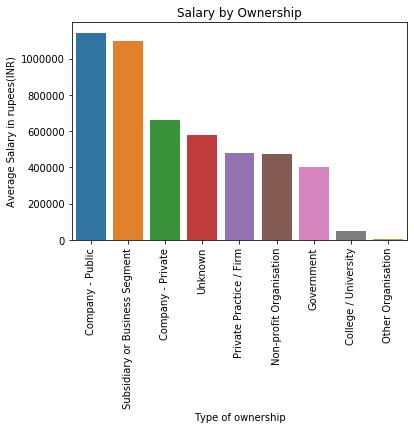

In [42]:
df5=df.groupby(by=['Type of ownership'])['avg_salary'].mean().reset_index().sort_values(by='avg_salary',ascending=False)
ax = sns.barplot(x = 'Type of ownership', y = 'avg_salary',data = df5)
plt.xticks(rotation='vertical')
ax.set_title('Salary by Ownership')
ax.set_ylabel('Average Salary in rupees(INR)')
plt.savefig('top_salary_by_ownership.png',bbox_inches='tight',pad_inches=0.5)

### By the above graph we can say that Public owned companies pay highest salary.

### Now lets see the highest paying sector

Text(0, 0.5, 'Average Salary in rupees(INR)')

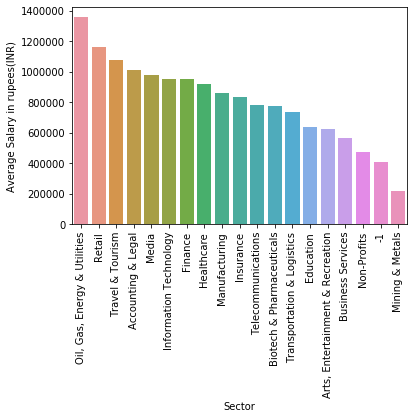

In [43]:
df6=df.groupby(by=['Sector'])['avg_salary'].mean().reset_index().sort_values(by='avg_salary',ascending=False)
ax = sns.barplot(x = 'Sector', y = 'avg_salary',data = df6)
plt.xticks(rotation='vertical')
ax.set_ylabel('Average Salary in rupees(INR)')

#### Now lets see which industry is paying highest average salary

Text(0, 0.5, 'Average Salary in rupees(INR)')

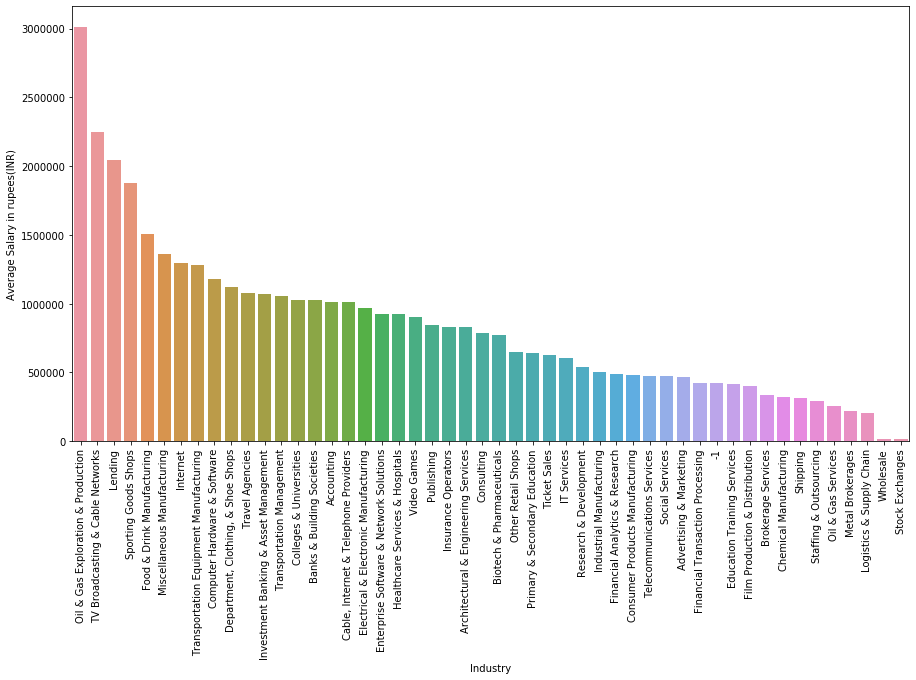

In [44]:
df7=df.groupby(by=['Industry'])['avg_salary'].mean().reset_index().sort_values(by='avg_salary',ascending=False)
plt.figure(figsize=(15,8)) #give the size of graph

ax = sns.barplot(x = 'Industry', y = 'avg_salary',data = df7)
plt.xticks(rotation='vertical')
ax.set_ylabel('Average Salary in rupees(INR)')

In [45]:
pd.pivot_table(df, index = ['Location','job_title_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending = False)


avg_salary
Location   job_title_simplified                 
Bengaluru  data scientist                    123
           data engineer                      48
           analyst                            41
           other                              33
Mumbai     data scientist                     33
...                                          ...
Kolkata    manager                             1
Kozhikode  data scientist                      1
Ludhiana   data scientist                      1
Madurai    machine learning engineer           1
Vijayawada analyst                             1

[86 rows x 1 columns]

### BY above table we can see number of post job by title in each cities
### Bengaluru have highest number of jobs for data scientist then data engineer.Similarly Mumbai have the second highest job post for data scientisT And SO ON...

In [46]:
df7=pd.pivot_table(df, index = ['Location','job_title_simplified'], values = 'avg_salary', aggfunc = 'count').reset_index().sort_values('avg_salary', ascending = False)[:13]


Text(0, 0.5, 'Count')

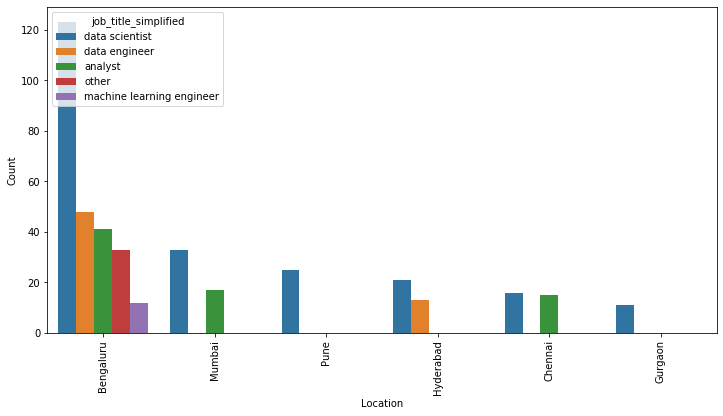

In [47]:
fig, a= plt.subplots(figsize=(12,6))

ax = sns.barplot(x = 'Location', y = 'avg_salary', hue='job_title_simplified',ax=a,data = df7)

#plt.figure(figsize=(15,15)) 

plt.xticks(rotation=90)
ax.set_ylabel('Count')
#ax.set_xlabel('')

### Lets check how many companies demanded for python

In [48]:
def python(x):
    try:
        if 'python' in x.lower():
            return 1
        else:
            return 0
    except:
        return "not available"

In [49]:
#making new column with value 1 if there is python in company's description otherwise 0
df['python'] = df['Job Description'].apply(python)

In [50]:
#406 companies demanded for python
df['python'].value_counts()

1                406
0                189
not available      1
Name: python, dtype: int64

In [51]:
#68% company demands python
(df['python'].value_counts()[1]*100)/len(df.index)

68.12080536912751

In [52]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [53]:
df.isnull().sum()

Company Name              0
Competitors               0
Founded                 115
Headquarters              0
Industry                  0
Job Description           1
Job Title                 0
Location                  0
Rating                    0
Revenue                   0
Salary Estimate           0
Sector                    0
Size                      0
Type of ownership         0
avg_salary                0
company_age             115
job_title_simplified      0
avg_revenue               0
python                    0
dtype: int64

In [54]:
#droping null values 
df['Job Description'] [:5]

0    Job Description – Data Scientist  Location: Ch...
1    What You Should Expect  To ride the wave of AI...
2    Provide analytical insights into emerging prob...
3    At Amazon, we strive to be most customer-centr...
4                                                  NaN
Name: Job Description, dtype: object

In [55]:
df=df.drop(df.index[4])

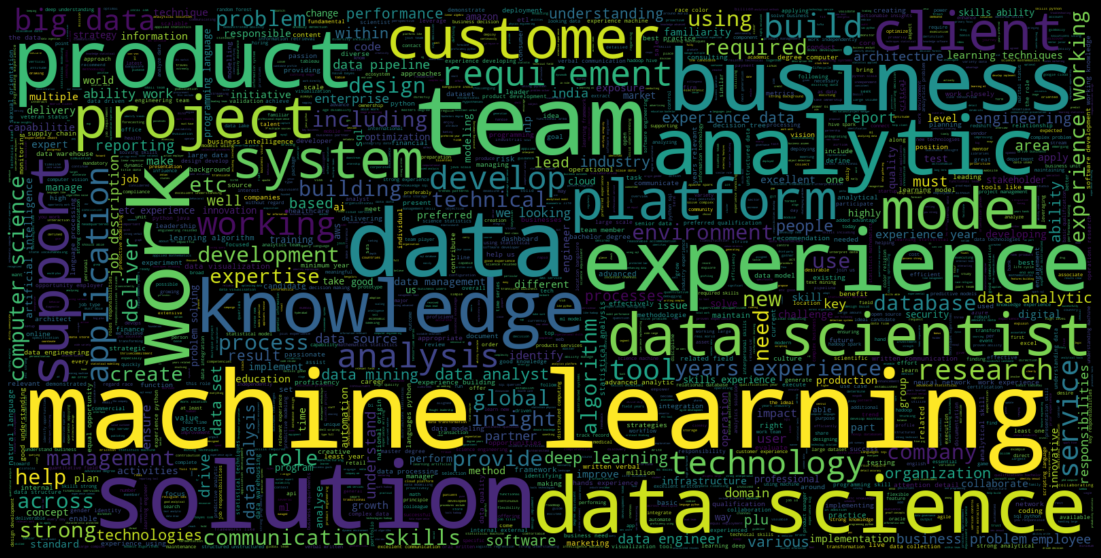

In [57]:
try:
    words = " ".join(df['Job Description'])
    #words=" ".join(map(str,df['Job Description'] ))
    def punctuation_stop(text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in stop_words and w.isalpha():
                filtered.append(w.lower())
        return filtered


    words_filtered = punctuation_stop(words)

    text = " ".join([ele for ele in words_filtered])

    wc= WordCloud(random_state=24,stopwords=STOPWORDS, max_words = 2000, width =1600, height = 800)
    wc.generate(text)
    #wc=  wc.to_file('WordCloud.png')    


    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(e)
    pass


## As we can see in the wordcloud 
* machine learning  and Experience is big in size we can interprete by this that this is most demanded which is pretty obvious.
* Many other skills are also demanded like Communication skill,deep learning,team work,tools,projects,big dataetc.
* Importance od the skill demanded can be analyse by consedering the size of that skill in the word cloud

# Conclusion

- Data Engineer and Data Science followed by Director, Machine Learning Engineer are high paid jobs.
- Bengaluru, Mumbai, Hyderabad,Pune,Chennai have the most number of jobs.
- Company with high revenue mostly give high salary.
- Public Owned Companies followed by Business Segments, Private Companies pay more salary.
- It terms of sector,IT companies come at position of 5 in paying salary.Retail,travel and tourism,media pays more.
- Python, machine learning,Year Of Experience,data science,,deep learning, Communication skills,Tools are the most demanded skills.